Imports

In [5]:
import numpy as np
from scipy.optimize import differential_evolution  #import differential evolution algorithm
import seaborn as sns
import matplotlib.pyplot as plt

Example of a custom function 
\begin{equation*}
y = -0.2 x^3 + 3 x^2+30sin(x) 
\end{equation*}
Evaluated between -10 and 10

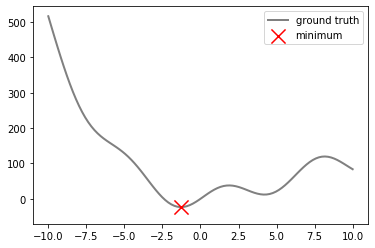

In [6]:
from scipy.optimize import differential_evolution  #import differential evolution algorithm

def fun_min(x):
    return -0.2*x**3+3*x**2+30*np.sin(x)  #studied function

x_0 = np.linspace(-10,10,100)  #generate 100 evenly spaced values from -10 to 10
y_0 = fun_min(x_0)

bounds = [(-10, 10)]  #define bounds within which algorithm will seek minimum


result = differential_evolution(fun_min, bounds) #here the magic happens. We feed the function and the bounds 
                                                 #to the algorithm

sns.lineplot(x_0,y_0,color="gray", lw=2,alpha=1,label="ground truth", zorder=1) #plot the ground truth
                                                                                #zorder defines the plotting
                                                                                #sequence, aka. what is on top
plt.scatter(result.x[0], result.fun[0],marker="x",s=200,c="r", label="minimum", zorder=10)
plt.legend()

Example of a function with two inputs

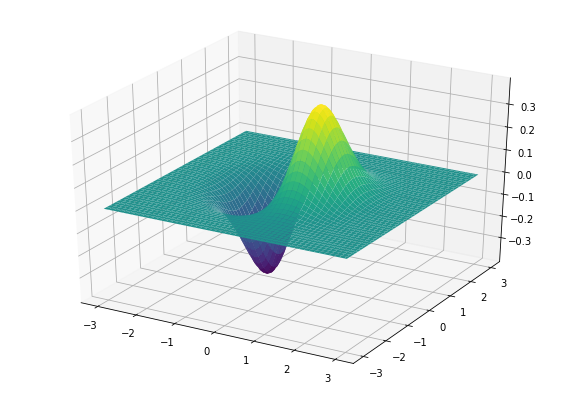

In [22]:
from mpl_toolkits.mplot3d import Axes3D  #importing some things necessary for 3D plot

def fun3d(vars):  #definition of a sample 3D function. See that it still takes only one variable
    x = vars[0]   #but now it is an array, which we have to deconstruct
    y = vars[1]
    return np.sin(x)*np.exp(-x**2-y**2)

x = np.linspace(-3,3,100)  #defining X and Y space
y = np.linspace(-3,3,100)
x, y = np.meshgrid(x, y)   #convert x and y to a mesh, so we get a point for each intersection of x and y
z = fun3d([x,y])           #feed the function

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')  #define 3D plot
ax.plot_surface(x, y, z, cmap=plt.cm.viridis, linewidth=0.2, alpha=1)  #let's plot the function to verify
                                                                       #that everything works
plt.show()

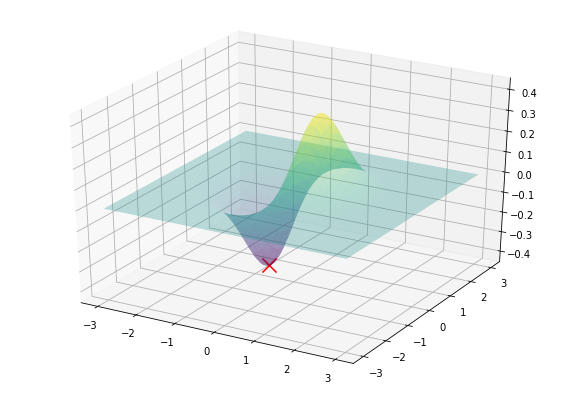

In [23]:
bounds = [(-3,3),(-3,3)]  #define the bounds
result = differential_evolution(fun3d, bounds) #feed the function and the bounds to DE algorithm

#and we plot everything again
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, cmap=plt.cm.viridis, linewidth=0.2, alpha=0.3)
ax.scatter(result.x[0], result.x[1], result.fun, c="r", marker="x",s=200)
plt.show()

Example of a well planning function. 

Unfortunately I already tried with more points, and even at 10 it takes a lot of time and does not guarranty good results.

In [24]:
def t2Da(data):
    xy_data = [[0,0],[-1,0]]
    
    for i in range(len(data)):
        if i%2 == 0:
            xy_data[0].append(data[i])
        else:
            xy_data[1].append(data[i])
            
    xy_data[0].append(1)
    xy_data[1].append(1)
    xy_data[0].append(2)
    xy_data[1].append(1)
    
    cost = 0
    
    for i in range(2, len(xy_data[0])):
        
        P2x = xy_data[0][i-2]
        P2y = xy_data[1][i-2]

        P1x = xy_data[0][i-1]
        P1y = xy_data[1][i-1]

        P3x = xy_data[0][i]
        P3y = xy_data[1][i]

        rad = np.arctan2(P3y - P1y, P3x - P1x) - np.arctan2(P2y - P1y, P2x - P1x)
        deg = 180 - np.abs(rad/2/np.pi*360)
        
        if deg >= 180:
            deg = deg - 180

        
        cost = cost  + deg**2


    return cost

Defining how many points to use and running the evolution

In [27]:
n=4 #how many points?
bounds = []
for i in range(n*2):
    bounds.append((0,1))
    
result = differential_evolution(t2Da, bounds)

result

     fun: 1350.000000020422
     jac: array([-0.06575647,  0.02314664, -0.01273293,  0.02009983,  0.06543814,
       -0.0881073 , -0.03653895,  0.06239134])
 message: 'Optimization terminated successfully.'
    nfev: 15123
     nit: 123
 success: True
       x: array([0.02447336, 0.09133602, 0.37453571, 0.69766199, 0.48306656,
       0.80619302, 0.66177958, 0.9093736 ])

A function to generate coordinates

In [28]:
def dt2Da(data):
    xy_data = [[0,0],[-1,0]]
    
    for i in range(len(data)):
        if i%2 == 0:
            xy_data[0].append(data[i])
        else:
            xy_data[1].append(data[i])
            
    xy_data[0].append(1)
    xy_data[1].append(1)
    xy_data[0].append(2)
    xy_data[1].append(1)
    
    
    return xy_data

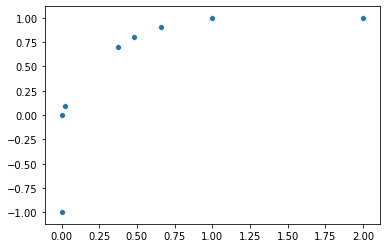

In [29]:
data = dt2Da(result.x)
sns.scatterplot(x = data[0], y=data[1])
